#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.04 Convolution and Filtering - Spatial Domain</font>

# <font color=red>BASICS</font>

In Lesson 3, we explored filtering via the application of convolution to timeseries
data. In this lesson, we'll see how convolution can be used to filter spatial data. In addition, because
in practice data often contain both real signal and noise, in this lesson we'll examine the properties of
one type of noise - white noise.

### Setup

In [ ]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.04.B1) Convolving a Spatial Pattern</font>

### <font color=red>DSP.B1.a) The Steps</font>

Create a spatial pattern with a spatial frequency of 25 cycles per meter.

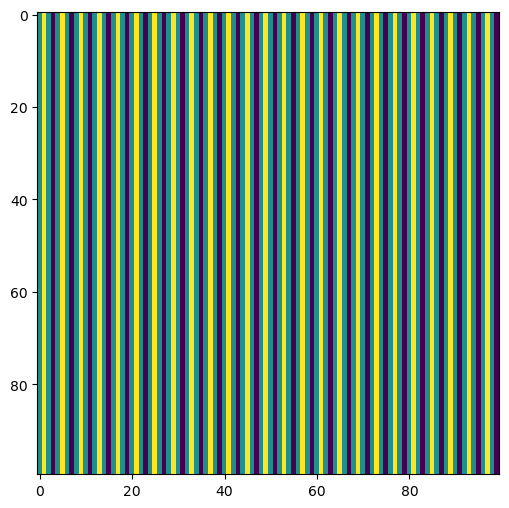

In [2]:
x = np.arange(0,1, 0.01)
y = np.arange(1, 0, -0.01)

X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 25 * X) 

plt.imshow(Z)
plt.show()

Don't count. Take our word for it - this is a 25 cycles per meter spatial pattern (along the x axis).

Create a spatial pattern with a spatial frequency of 10 cycles per meter.

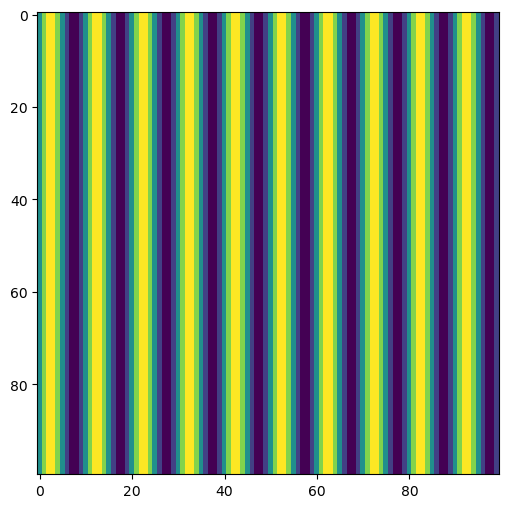

In [3]:
Z = np.sin(2*np.pi * 10 * X) 

plt.imshow(Z)
plt.show()

Sum the 25 cycles per meter and 10 cycles per meter spatial patterns.

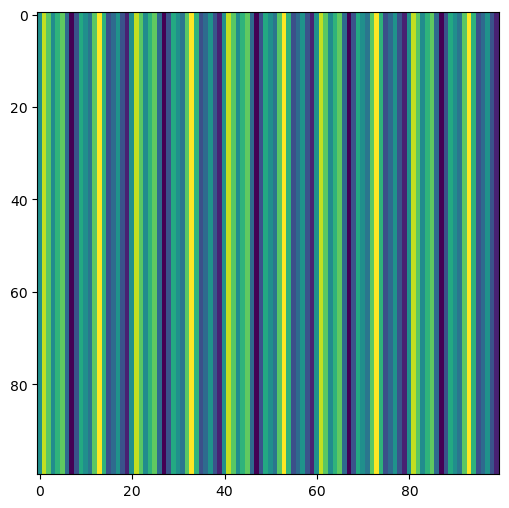

In [4]:
Z = np.sin(2*np.pi * 25 * X) + np.sin(2*np.pi * 10 * X)

plt.imshow(Z)
plt.show()

Suppose the 25 cycles per meter activity is 'noise'. Although you can see the original 10 cycles per meter
spatial pattern, the 10 cycles per meter spatial pattern is obscured.

Can convolution be used to remove the 25 cycles per meter activity from this spatial pattern?

Answer: Give it a try. As with a timeseries, the moving-average convolution technique can be used to remove
high-frequency noise from a spatial pattern.

However, instead of a 1D kernel, for a 2D spatial series a 2D kernel is needed.
Create a 3 X 3 kernel with constant values the reciprocal of the size of the matrix.

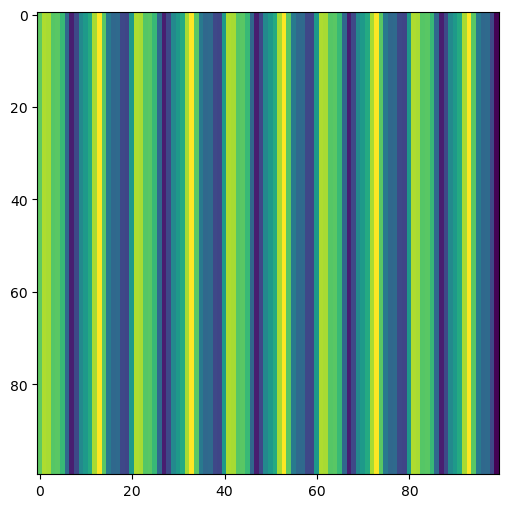

In [5]:
from scipy import signal

kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])
Zfiltered = signal.convolve2d(Z,kernel,boundary='symm', mode='same')
plt.imshow(Zfiltered)
plt.show()

The filtered image more closely approximates the 10 cycle per meter image, although there is still distortion.

Change the size of the kernel to see if a better image can be obtained. Try a smaller kernel.

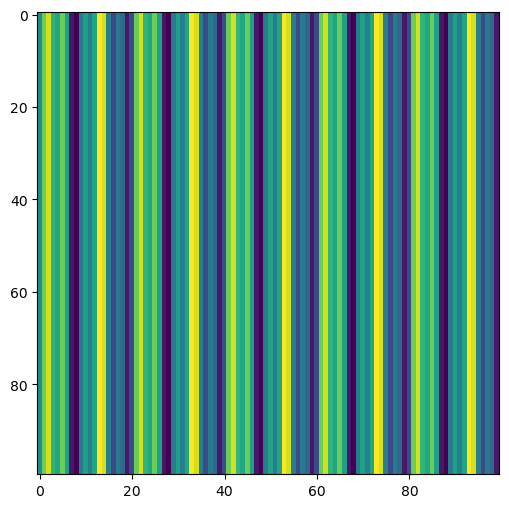

In [6]:
from scipy import signal

kernel = np.array([[1/4, 1/4],
                   [1/4, 1/4]])                   
Zfiltered = signal.convolve2d(Z,kernel,boundary='symm', mode='same')
plt.imshow(Zfiltered)
plt.show()

Looks Ok, but still not perfect.

Try a larger kernel.

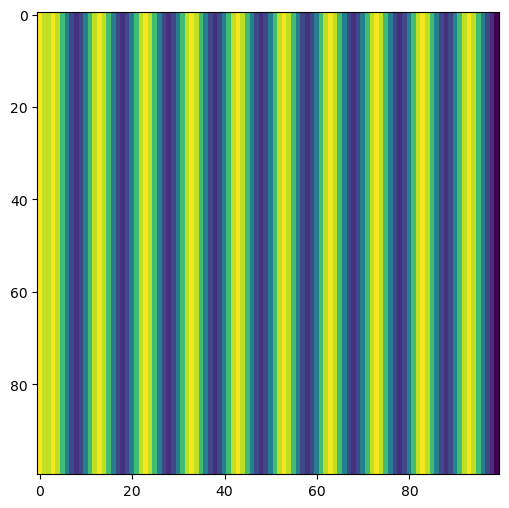

In [7]:
from scipy import signal

kernel = np.array([[1/16, 1/16, 1/16, 1/16],
                   [1/16, 1/16, 1/16, 1/16],
                   [1/16, 1/16, 1/16, 1/16],
                   [1/16, 1/16, 1/16, 1/16]])                  
Zfiltered = signal.convolve2d(Z,kernel,boundary='symm', mode='same')
plt.imshow(Zfiltered)
plt.show()

Looks good.

Which kernel is preferred?

Answer: The plots above have a sampling rate of 100 samples per meter. Thus, the 25 cycles per meter spatial
pattern completes 25 full cycles over 100 points.

As 100/25 = 4, a kernel of size 4 covers one complete cycle.

Take another look at the spatial pattern when a kernel of size four is applied.

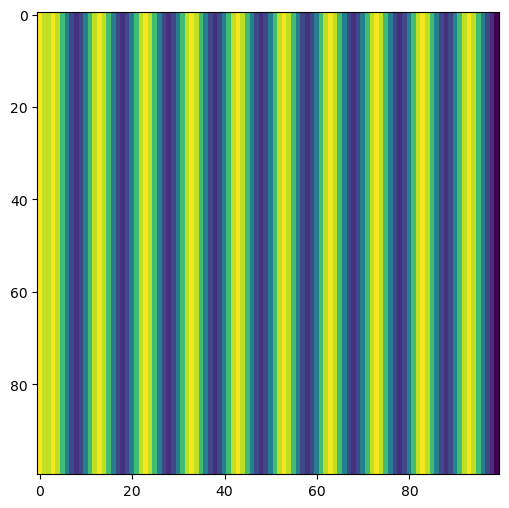

In [8]:
from scipy import signal

kernel = np.array([[1/16, 1/16, 1/16, 1/16],
                   [1/16, 1/16, 1/16, 1/16],
                   [1/16, 1/16, 1/16, 1/16],
                   [1/16, 1/16, 1/16, 1/16]])                  
Zfiltered = signal.convolve2d(Z,kernel,boundary='symm', mode='same')
plt.imshow(Zfiltered)
plt.show()

As expected, this kernel does a good job of removing the 25 cycles per meter activity.

## <font color=red>DSP.04.B2) Normal Distributions</font>

In later sections we’ll want to take a look at noise. Before looking at noise, let's start with an examination
of normal distributions.

### <font color=red>DSP.B2.a) Gauss's normal law</font>
**This section first developed by Prof. Bruce Carpenter (Univeristy of Illinois Urbana-Champaign)**

The

normal

law of error

stands out in the

experience of mankind

as one of the broadest

generalizations of natural

philosophy ~ It serves as the

guiding instrument in researches

in the physical and social sciences and

in medicine agriculture and engineering ~

It is an indispensable tool for the analysis and the

interpretation of the basic data obtained by observation and experiment.

This bell shaped design is by statistician W. J. Youden

Paraphrasing Mark Kac:
    
All observations, constructions, and measurements are subject to error.

You can classify errors or deviations as follows:
    
→ Gross errors or deviations,

→ Systematic errors or deviations,

→ Random errors or deviations.

Sufficient care can eliminate gross errors, gross deviations, systematic errors, and systematic deviations.
But random errors and random deviations are another story. The great German mathematician
Karl Friedrich Gauss (1777-1855) developed a theory to deal with random errors or deviations.

The idea is (a) that observations vary somewhat - due to noise - around the true value that you’re trying
to measure, and (b) that the distribution of that variability around the true value often has a particular
form, called a Gaussian distribution or a “normal” distribution. (The meaning of “normal” here isn’t the
normal meaning of “normal”...)

Here is Gauss's theory in a nutshell:

Start with a measurement, construction, or observation M. Call the true value of the measurement,
construction, or observation by the name "mean."

Gauss's theory says that often you can find a value "dev" (technical name "standard deviation"), so that the proportion or fraction
of the time that M is between a value "a" and a value "b" (a ≤ M ≤ b) is given by

$\int_a^b normal[x, mean, dev] dx$,
where "normal" refers to the function commonly called the bell, normal, or Gaussian distribution.

For instance, if
mean = 70 and dev = 10,
then the fraction of the time that 
65 ≤ M ≤ 75
is given by
$\int_{65}^{75} normal[x, 70, 10] dx$:

In [9]:
from scipy.stats import norm

norm.cdf(75, loc=70, scale=10) - norm.cdf(65, loc=70, scale=10)

0.38292492254802624

About 38 % of the time, M comes out between 65 and 75. To see what fraction of the time M comes out
between 60 and 80, calculate $\int_{60}^{80} normal[x, 70, 10] dx$:

In [10]:
from scipy.stats import norm

norm.cdf(80, loc=70, scale=10) - norm.cdf(60, loc=70, scale=10)

0.6826894921370859

About 68 % of the time, M comes out between 60 and 80.

If you have less random error, such that you can cut dev from 10 to 5, then the fraction of the time that
M falls between 60 and 80 is given by $\int_{60}^{80} normal[x, 70, 5] dx$ :

In [11]:
from scipy.stats import norm

norm.cdf(80, loc=70, scale=5) - norm.cdf(60, loc=70, scale=5)

0.9544997361036416

Now with dev reduced to dev = 5, M comes out between 60 and 80 about 95% of the time.

Use a plot to explain why it turns out that, with the lower value of dev, M came out between 60 and 80
more of the time than it did with the higher value of dev.

Answer:
    
Here are plots of normal[x,mean,5] and normal[x,mean,10]
with mean = 70 in both:

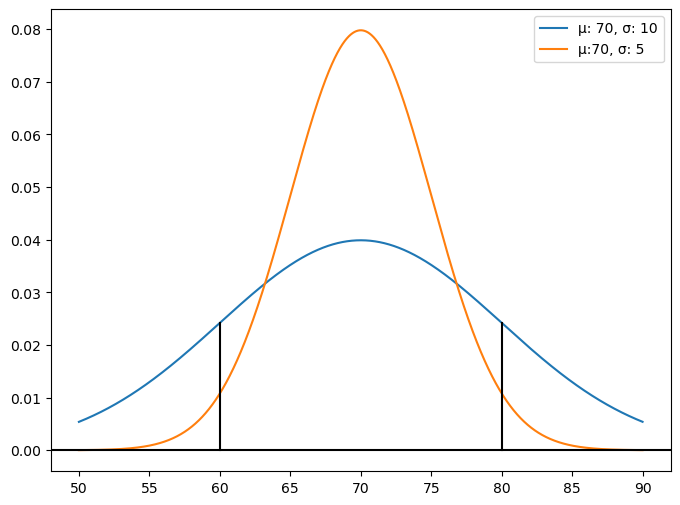

In [12]:
from scipy.stats import norm

#x-axis ranges from 50 and 90 with .01 steps
x = np.arange(50, 90, 0.01)
y1 = norm.pdf(x, 70, 10);
y2 = norm.pdf(x, 70, 5);

x60_ind = round((60 - 50) / 0.01)
x80_ind = round((80 - 50) / 0.01)

plt.plot(x, y1, label='μ: 70, σ: 10')
plt.plot(x, y2, label='μ:70, σ: 5')

plt.plot([60,60], [0,y1[x60_ind]], color='k')
plt.plot([80,80], [0,y1[x80_ind]], color='k')
plt.axhline(y=0, color='k')
 

#add legend to plot
plt.legend()

An important point is that, although the 2 curves are obviously different, they are the same TYPE of
curve - a Gaussian or normal curve. That means that they’re symmetrical around the mean value and
that they taper off in a specific way. Exactly how fast they taper can vary - hence the 2 curves. Here,
they have the same mean but different standard deviations.

As x goes from -∞ to ∞, the area between the x axis and each curve (in other words, the area under the curve) is 1, because
$\int_{-∞}^{∞} normal[x, mean, dev] dx$ = 1 no matter what mean and dev are, as long as dev > 0.

The plot of normal[x,70,5] (more peaky plot) packs more of this area between x = 60 and x = 80 than does the
plot of normal[x,70,10] (flatter plot).

That is why $\int_{60}^{80} normal[x, 70, 5] dx$ > $\int_{60}^{80} normal[x, 70, 10] dx$.

Moral:
    
The lower the standard deviation (dev), the more likely M will come out near its mean.

### <font color=red>DSP.B2.b) Gauss's normal law in action: Weights of nine-year-old Canadian boys</font>

Here are the results of a study of a sample of Canadian nine-year-old boys with
x = weight within 2.5 pounds and y = number of boys with weight x. Using x and y together, we can create a histogram to describe the sample.

All weights are given within an accuracy of 2.5 pounds.

Source: Mark Kac, Enigmas of Chance,
    
University of California Press, Berkeley, 1985.

In [13]:
x = np.array([42,47,52,57,62,67,72,77,82,87,92,97,102,107,112,117])
y = np.array([20,146,553,979,1084,807,468,180,103,41,25,21,11,5,5,3])
x

array([ 42,  47,  52,  57,  62,  67,  72,  77,  82,  87,  92,  97, 102,
       107, 112, 117])

In [14]:
y

array([  20,  146,  553,  979, 1084,  807,  468,  180,  103,   41,   25,
         21,   11,    5,    5,    3])

Calculate the average weight:

In [15]:
n = np.sum(y)
weight_avg = np.sum(np.multiply(x,y)) / n
weight_avg

62.90990788586834

Take a look at a plot of the data:

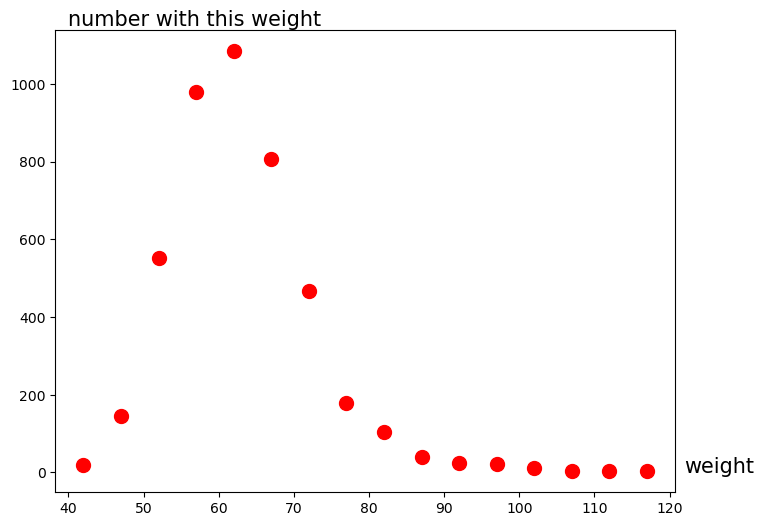

In [16]:
plt.scatter(x, y, c ="red", s=100)
plt.text(122,0,'weight',fontsize=15)
plt.text(40,1150,'number with this weight',fontsize=15)
 
# To show the plot
plt.show()

Is that bell-shaped, or what? Well, it tapers on both sides, but it doesn’t look very symmetrical. So
maybe it’s not a normal distribution. However, we can model it as if it were normal. We might be
surprised how things look after we do that.

Come up with a value of mean, a value of t (as an approximation of mean), and a value of dev so that t normal[x,mean,dev] gives a
good fit of these data.

Answer: Remember, the average weight is 63 pounds.

Start by finding t and dev so that the plot of t normal[x,63,dev] does a good job of modeling the data.
Make refinements later. Look at the data:

In [17]:
x

array([ 42,  47,  52,  57,  62,  67,  72,  77,  82,  87,  92,  97, 102,
       107, 112, 117])

In [18]:
y

array([  20,  146,  553,  979, 1084,  807,  468,  180,  103,   41,   25,
         21,   11,    5,    5,    3])

The biggest y-slot is 1084; that is where you want the top of the bell to be. Notice that this happens near
x = 63, the average weight:

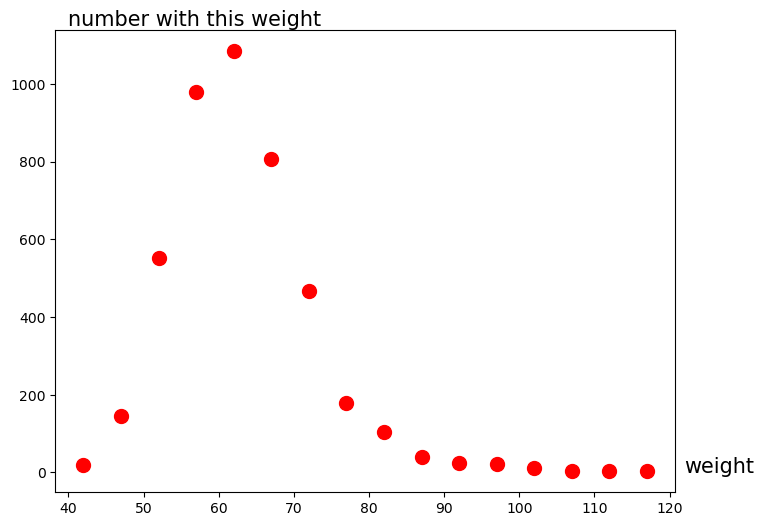

In [19]:
plt.scatter(x, y, c ="red", s=100)
plt.text(122,0,'weight',fontsize=15)
plt.text(40,1150,'number with this weight',fontsize=15)
 
# To show the plot
plt.show()

This means that it's a good idea at first to go with t and dev so that 1084 = t normal[63,63,dev].

1084 = $\frac{t}{dev\sqrt{2\pi}}$

Now try dev = 4. Note: we're going to widen the x-axis - instead of spanning 40 to 120, it'll span 0 to 120.

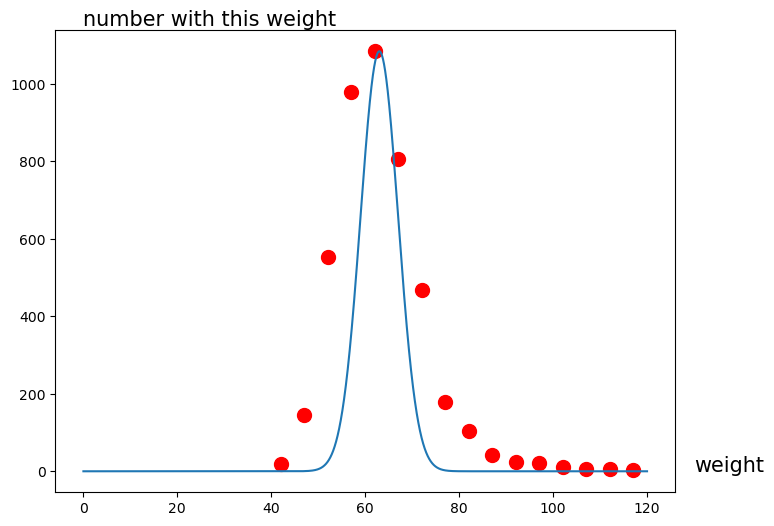

In [20]:
from scipy.stats import norm

#x-axis ranges from 0 and 120 with .01 steps
x2 = np.arange(0, 120, 0.01)
dev = 4
t = 1084 * dev * np.sqrt(2*np.pi)

#define multiple normal distributions
plt.plot(x2, t * norm.pdf(x2, 63, dev))

plt.scatter(x, y, c ="red", s=100)
plt.text(130,0,'weight',fontsize=15)
plt.text(0,1150,'number with this weight',fontsize=15)
 
# To show the plot
plt.show()

Increase dev from 4 to 8 to make the bell wider:

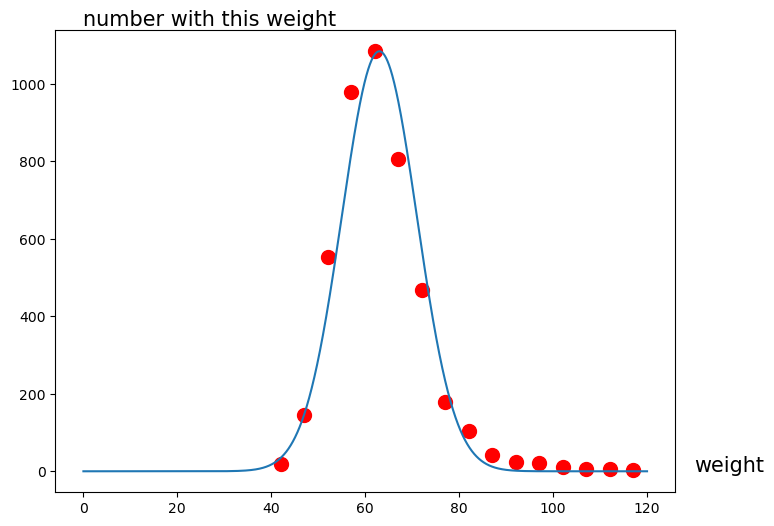

In [21]:
from scipy.stats import norm

#x-axis ranges from 0 and 120 with .01 steps
x2 = np.arange(0, 120, 0.01)
dev = 8
t = 1084 * dev * np.sqrt(2*np.pi)

#define multiple normal distributions
plt.plot(x2, t * norm.pdf(x2, 63, dev))

plt.scatter(x, y, c ="red", s=100)
plt.text(130,0,'weight',fontsize=15)
plt.text(0,1150,'number with this weight',fontsize=15)
 
# To show the plot
plt.show()

Lookin' pretty good.

Refine it by shifting the plot a wee bit to the left:

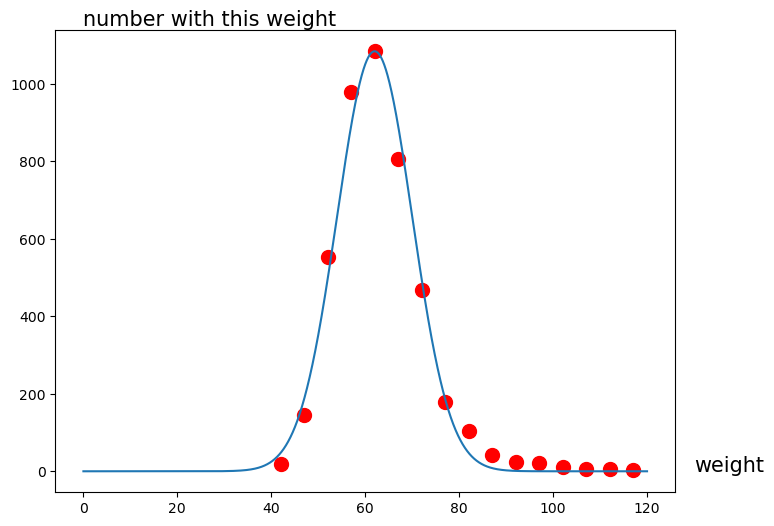

In [22]:
from scipy.stats import norm

#x-axis ranges from 0 and 120 with .01 steps
x2 = np.arange(0, 120, 0.01)
dev = 8
t = 1084 * dev * np.sqrt(2*np.pi)

#define multiple normal distributions
plt.plot(x2, t * norm.pdf(x2, 62, dev))

plt.scatter(x, y, c ="red", s=100)
plt.text(130,0,'weight',fontsize=15)
plt.text(0,1150,'number with this weight',fontsize=15)
 
# To show the plot
plt.show()

That is really a pretty good fit. You might try for a better fit, but the data are rough enough that a supergood
fit isn't realistic.

### <font color=red>DSP.B2.c) Gauss’s normal law: fraction of boys with a given weight</font>

Look again at the data:

In [23]:
x

array([ 42,  47,  52,  57,  62,  67,  72,  77,  82,  87,  92,  97, 102,
       107, 112, 117])

In [24]:
y

array([  20,  146,  553,  979, 1084,  807,  468,  180,  103,   41,   25,
         21,   11,    5,    5,    3])

This is in the form with x = weight within 2.5 pounds and y = number of boys with weight x.

Convert to a new form so that y = the fraction of the total sample with weight x:

In [25]:
n = np.sum(y)
y2 = np.divide(y,n)
y2

array([0.00449337, 0.03280162, 0.12424174, 0.21995057, 0.24354078,
       0.18130757, 0.10514491, 0.04044035, 0.02314087, 0.00921141,
       0.00561672, 0.00471804, 0.00247135, 0.00112334, 0.00112334,
       0.00067401])

Remember, the weights are given to the nearest 2.5 pounds.

Here are the fractions for the boys with weights between 49.5 pounds and 79.5 pounds:

In [26]:
mask = (x < 79.5) & (x > 49.5)
x_frac = x[mask]
y_frac = y2[mask]
x_frac

array([52, 57, 62, 67, 72, 77])

In [27]:
y_frac

array([0.12424174, 0.21995057, 0.24354078, 0.18130757, 0.10514491,
       0.04044035])

The fraction of the boys with weights between 49.5 pounds and 79.5 pounds is:

In [28]:
np.sum(y_frac)

0.9146259267580319

Now take the function you got from the fit in part i), normal[x,62,8], and look at $\int_{49.5}^{79.5} normal[x, 62, 8] dx$:

In [29]:
from scipy.stats import norm

norm.cdf(79.5, loc=62, scale=8) - norm.cdf(49.5, loc=62, scale=8)

0.9265618554585308

This is very close to the fraction of the boys with weights between 49.5 pounds and 79.5 pounds. So, the norm distribution does a pretty good job of modeling the true distribution of weights.

Try it again, for a different weight range.

In [30]:
x

array([ 42,  47,  52,  57,  62,  67,  72,  77,  82,  87,  92,  97, 102,
       107, 112, 117])

In [31]:
y2

array([0.00449337, 0.03280162, 0.12424174, 0.21995057, 0.24354078,
       0.18130757, 0.10514491, 0.04044035, 0.02314087, 0.00921141,
       0.00561672, 0.00471804, 0.00247135, 0.00112334, 0.00112334,
       0.00067401])

Remember, the weights are given to the nearest 2.5 pounds.

Here are the fractions for the boys with weights between 54.5 pounds and 69.5 pounds:

In [32]:
mask = (x < 69.5) & (x > 54.5)
x_frac = x[mask]
y_frac = y2[mask]
x_frac

array([57, 62, 67])

In [33]:
y_frac

array([0.21995057, 0.24354078, 0.18130757])

The fraction of the boys with weights between 54.5 pounds and 69.5 pounds is:

In [34]:
np.sum(y_frac)

0.6447989215906538

Now take the function you got from the fit in part i), normal[x,62,8], and look at
$\int_{54.5}^{69.5} normal[x, 62, 8] dx$ :

In [35]:
from scipy.stats import norm

norm.cdf(69.5, loc=62, scale=8) - norm.cdf(54.5, loc=62, scale=8)

0.6514985762389152

This is very close to the fraction of the boys whose weights measure out between 54.5 pounds and 69.5
pounds.

What is going on here?

Answer: You're seeing Gauss's normal law in action.

Once you have a good fit of the data as done above, you can estimate the fraction of weights that came
out between a and b by calculating $\int_{a}^{b} normal[x, 62, 8] dx$ .

To see why this works, look at the last plot:

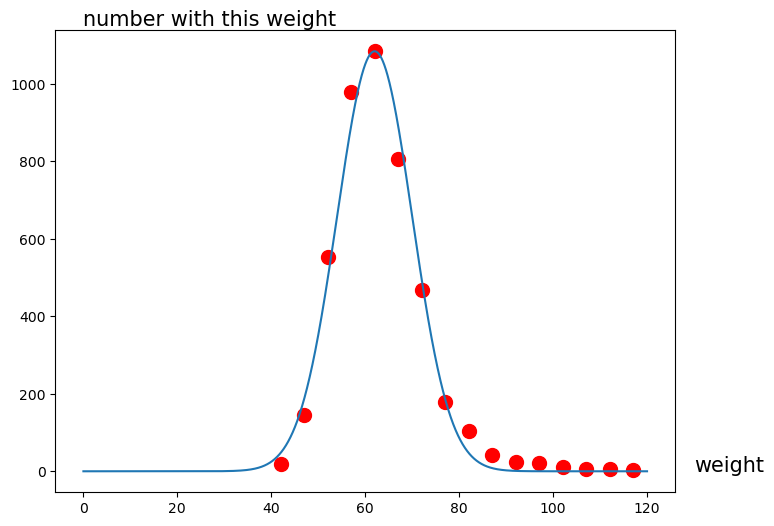

In [36]:
from scipy.stats import norm

#x-axis ranges from 0 and 120 with .01 steps
x2 = np.arange(0, 120, 0.01)
dev = 8
t = 1084 * dev * np.sqrt(2*np.pi)

#define multiple normal distributions
plt.plot(x2, t * norm.pdf(x2, 62, dev))

plt.scatter(x, y, c ="red", s=100)
plt.text(130,0,'weight',fontsize=15)
plt.text(0,1150,'number with this weight',fontsize=15)
 
# To show the plot
plt.show()

The curve plotted here is a multiple of normal[x,62,8].

Here is the mathematical beauty of it:
    
Because $\int_{-∞}^{∞} normal[x, mean, dev] dx$ = 1 no matter what mean and dev are, you are guaranteed that
$\int_{-∞}^{∞} normal[x, 38, 8] dx$ = 1.

The upshot:
    
$\int_{a}^{b} normal[x, mean, dev] dx$ measures the fraction of the area under the plotted curve over the interval [ a,b ] on the x axis. And
because this plotted curve is a good approximation of the data,$\int_{a}^{b} normal[x, mean, dev] dx$ also estimates the fraction of the weights that are between a and b.
That is all there is to it.

This is especially useful when you want to estimate fractions of weights that aren't specifically
included in the original data.

For instance, you can estimate the fraction of the boys whose weights are between 50 and 80 pounds
by calculating:$\int_{50}^{80} normal[x, 63, 8] dx$ :

In [37]:
from scipy.stats import norm

norm.cdf(80, loc=63, scale=8) - norm.cdf(50, loc=63, scale=8)

0.9311254141363317

About 93 % of the boys had weights between 50 and 80 pounds. In other words, if you select one of the
kids at random, about 93 % of the time you will select a kid whose weight is between 50 and 80 pounds.
The fancy folks say that a kid has weight between 50 and 80 pounds with probability 0.93.

To see what fraction of the kids have weights over 80 pounds, calculate
$\int_{80}^{∞} normal[x, 63, 8] dx$ :

In [38]:
from scipy.stats import norm

1 - norm.cdf(80, loc=63, scale=8)

0.016793306448448786

About 2% of the boys had weights over 80 pounds. In other words, if you select one of the kids at
random, about 2% of the time you will select a kid whose weight is over 80 pounds.

### <font color=red>DSP.B2.d) Normal Distributions: mean and standard deviation</font>

What do folks mean when they say that a measurement M is normally distributed with mean = m and
standard deviation = s?

Answer: They mean that the fraction of the time that the measurement is between a and b is given by
$\int_{a}^{b} normal[x, m, s] dx$ .

The work above indicates that the weights of the Canadian boys are approximately normally distributed
with mean = 62 and standard deviation = 8, because you can get a reasonable estimate of the
fraction of the weights between a and b by calculating
$\int_{a}^{b} normal[x, 62, 8] dx$ .

### <font color=red>DSP.B2.e) Normal Distributions: mean and standard deviation</font>

When you suspect that a measurement M is normally distributed, how do you determine the specific
values of
mean = m
and
standard deviation = s?

Answer:
    
You get good data and then try to fit the data as we did earlier. Once you have a reasonable fit, you can
read off mean = m and standard dev = s as we did above.

### <font color=red>DSP.B2.f) Are all distributions normal?</font>

Are all measurements M normally distributed?

Answer: No way.
Statistics courses look at other possibilities. You can get a good idea of whether a given measurement is normally distributed by collecting data and trying to fit it as we did above. If you are successful, then
you know that the measurement M is normally distributed, and you can read off the mean and standard
deviation. If you're not able to find a pretty good fit, you conclude that the measurement is not normally
distributed.

## <font color=red>DSP.04.B3) Characterizing Noise</font>

### <font color=red>DSP.B3.a) Timeseries data with noise</font>

In several previous examples, noise was added to timeseries or spatial patterns. Check out this
timeseries of 30,000 random points (don't worry if it takes a few seconds to generate the plot - that's a lot
of points).

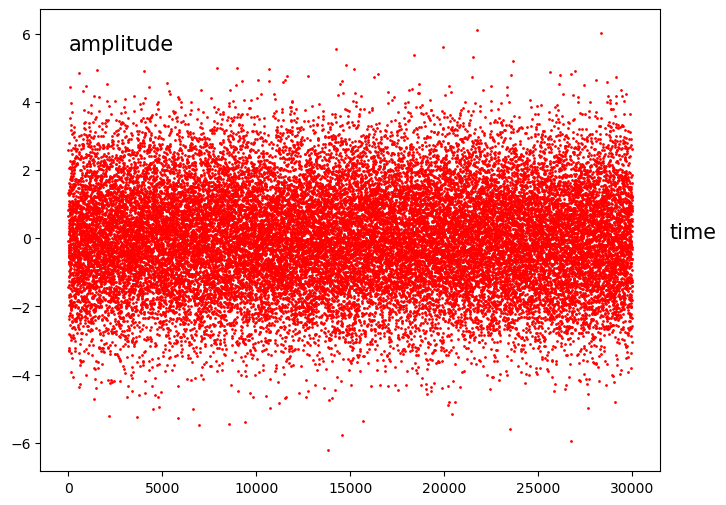

In [39]:
x = np.arange(0, 30000, 1)
noise = np.random.normal(0,1.5,30000)

plt.scatter(x, noise, c ="red", s=1)
plt.text(32000,0,'time', fontsize=15)
plt.text(0,5.5,'amplitude', fontsize=15)
 
# To show the plot
plt.show()

In the above code, the Python function 'np.random.normal' was used to create random noise.
The function accepts three values - the first is the mean, the second is the standard deviation, and the third is number of points.
It then chooses the latter number of values, randomly, from a normal curve. Take the dot product of the noise timeseries with itself and then calculate the mean (we could also say: convolve the noise timeseries with itself and then divide by the number of noise samples).

In [40]:
np.dot(noise,noise) / 30000

2.2633874762054305

Just about 2.27. Rerun the two cells above - in each case this mean value should be close to 2.25. 

Multiplying the noise timeseries with itself and then calculating the average value computes the
variance.

You might know that the variance is formally computed as variance(X) = Mean[ (x - μ)2 ].
That is, variance is the expected value of the square of the deviation of X from its own mean (μ).
In the example above, because the mean value of the timeseries is zero (as long as enough samples are collected), there is no need to subtract
the mean.

The variance quantifies the amount of dispersion around the mean. Variance is the average of the
square of the distance of each data point from the mean. The variance of a random variable X is typically
designated as var(X), or $σ^{2}$.

You may have learned about standard deviation and variance in a statistics class already. Or you may have learned an essentially identical idea
under a different name: root mean square. Take the square root of the mean of the squared values in a vector, and you have RMS or standard
deviation.

The unit of variance is the square of the unit of observation. For example, the variance of a set of
weights measured in pounds is given in square pounds. (That may sound strange, but it's no stranger than square meters.) In some contexts the
square root of the variance, known as the standard deviation, is more useful summary of dispersion.
In the code above, if you take a look, you will see that the standard deviation was set to 1.5. The variance
of the 1.5 standard deviation value calculated above is indeed 2.25 ($1.5^{2}$ = 2.25). 

### <font color=red>DSP.B3.b) Noise - normal distributions and standard deviations</font>

Check out this timeseries of 30,000 random points (don't worry if it takes a few seconds to generate the
plot - that's a lot of points).

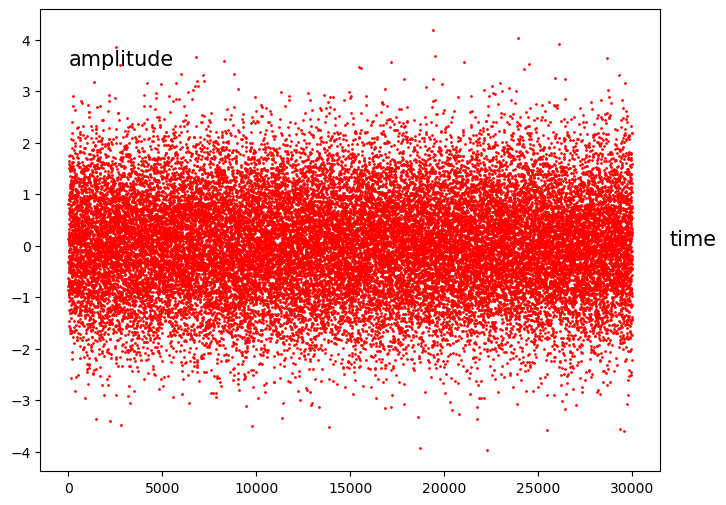

In [41]:
x = np.arange(0, 30000, 1)
noise = np.random.normal(0,1,30000)

plt.scatter(x, noise, c ="red", s=1)
plt.text(32000,0,'time', fontsize=15)
plt.text(0,3.5,'amplitude', fontsize=15)

plt.show()

To compute the variance, take the dot product of the noise timeseries with itself and then calculate the
mean (we could also say: convolve the noise timeseries with itself and then divide by the number of noise samples).

In [42]:
np.dot(noise,noise) / 30000

0.9871103437385602

The variance is approximately 1. Thus, the standard deviation is $\sqrt{1}$ = 1 (as shown in the 'np.random.normal'
settings). 

If the noise is normally distributed, a standard deviation value of 1 tells us that 68.27% of the noise
datapoints fall between +1/-1 standard deviations.

Here is a plot of the noise with a line drawn from the y axis showing the +1/-1 standard deviation boundary.

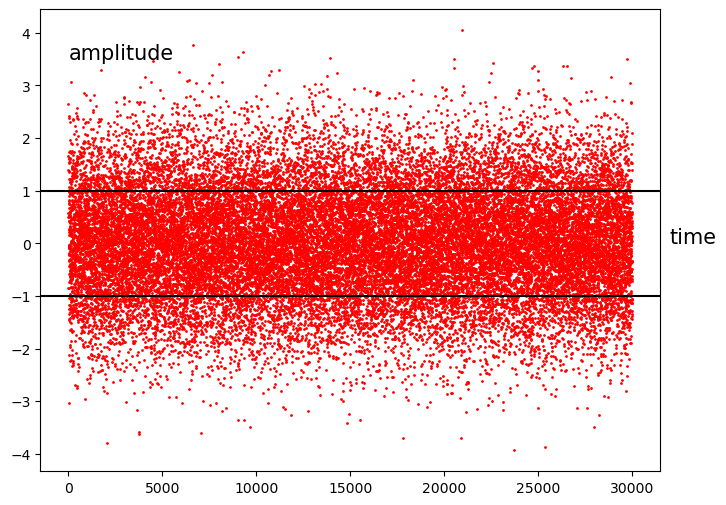

In [43]:
x = np.arange(0, 30000, 1)
noise = np.random.normal(0,1,30000)

plt.scatter(x, noise, c ="red", s=1)
plt.text(32000,0,'time', fontsize=15)
plt.text(0,3.5,'amplitude', fontsize=15)

plt.axhline(y=1, color='k')
plt.axhline(y=-1, color='k')
 
# To show the plot
plt.show()

68.27% of the datapoints are contained within this +/- 1 standard deviation boundary.

Redo this, now going out twice this distance on either side of the zero line.

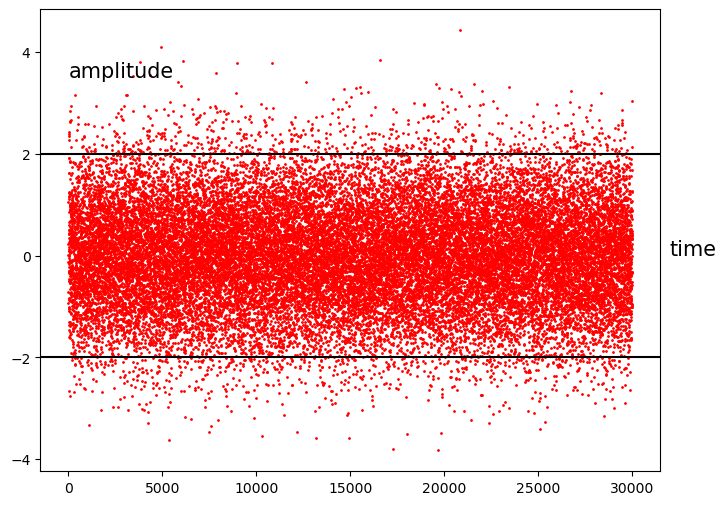

In [44]:
x = np.arange(0, 30000, 1)
noise = np.random.normal(0,1,30000)

plt.scatter(x, noise, c ="red", s=1)
plt.text(32000,0,'time', fontsize=15)
plt.text(0,3.5,'amplitude', fontsize=15)

plt.axhline(y=2, color='k')
plt.axhline(y=-2, color='k')
 
# To show the plot
plt.show()

Datapoints plotted within the grey lines fall inside the 2 standard deviation boundary. 95.45% of the
datapoints fall within this 2 standard deviation boundary.

Go out 3 times the original standard deviation measure.

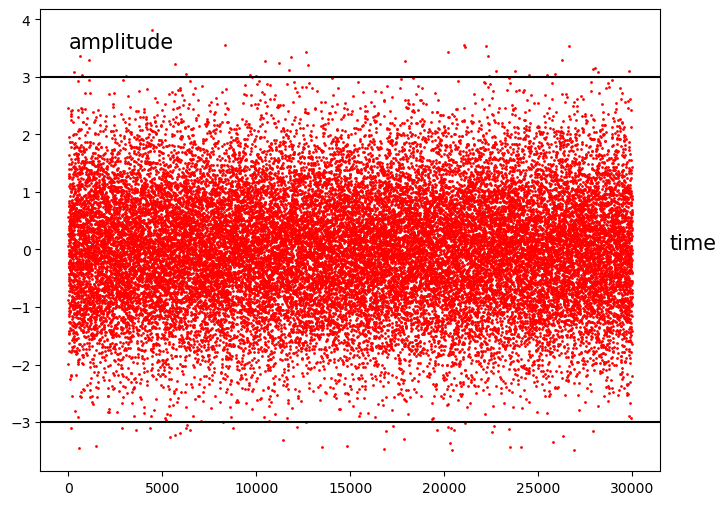

In [45]:
x = np.arange(0, 30000, 1)
noise = np.random.normal(0,1,30000)

plt.scatter(x, noise, c ="red", s=1)
plt.text(32000,0,'time', fontsize=15)
plt.text(0,3.5,'amplitude', fontsize=15)

plt.axhline(y=3, color='k')
plt.axhline(y=-3, color='k')
 
# To show the plot
plt.show()

99.73% of the datapoints fall within this 3 standard deviation boundary.
Only a few points (0.27 %) fall outside the 3 SD boundary.

### <font color=red>DSP.B3.c) Noise - standard deviations and bell curves</font>

In the examples above, the Numpy 'np.random.normal' function was used to set the noise
mean and standard deviation parameters.

In this next example, in the 'np.random.normal' function call, the first argument value (the mean) is set to zero, and the
argument value (the standard deviation) is set to 0.5. Via the third argument value, we again generate 30,000 random values from that normal distribution.

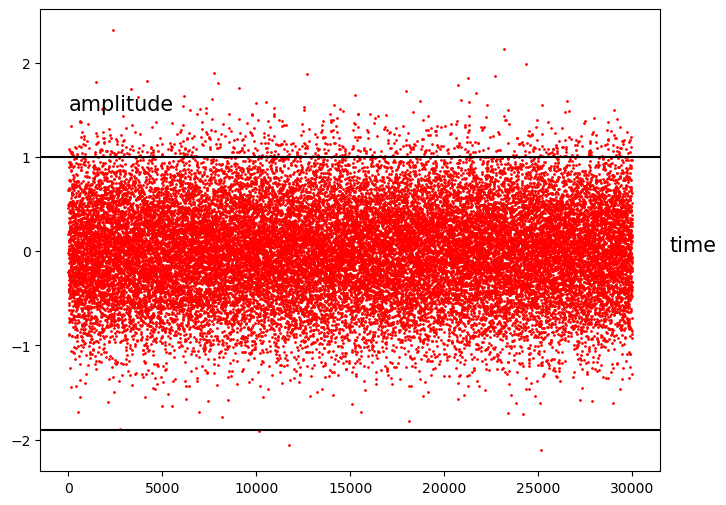

In [46]:
x = np.arange(0, 30000, 1)
noise = np.random.normal(0,0.5,30000)

plt.scatter(x, noise, c ="red", s=1)
plt.text(32000,0,'time', fontsize=15)
plt.text(0,1.5,'amplitude', fontsize=15)

plt.axhline(y=1, color='k')
plt.axhline(y=-1.9, color='k')
 
# To show the plot
plt.show()

Next, we'll set the standard deviation argument value to 2.0.

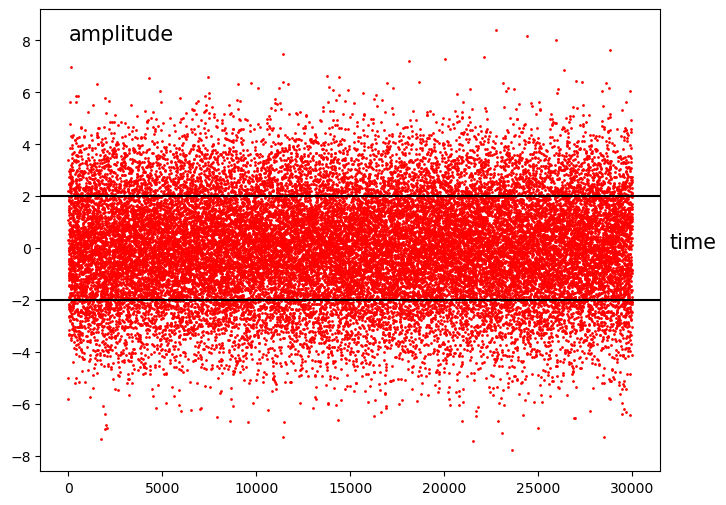

In [47]:
x = np.arange(0, 30000, 1)
noise = np.random.normal(0,2,30000)

plt.scatter(x, noise, c ="red", s=1)
plt.text(32000,0,'time', fontsize=15)
plt.text(0,8,'amplitude', fontsize=15)

plt.axhline(y=2, color='k')
plt.axhline(y=-2, color='k')
 
# To show the plot
plt.show()

Notice the change in the y axis. Relatively speaking, the smaller the variance value, the less noise there
is. The larger the variance value, the more noise and thus the wider the spread of points along the y axis.

We can show this normal distribution differently.

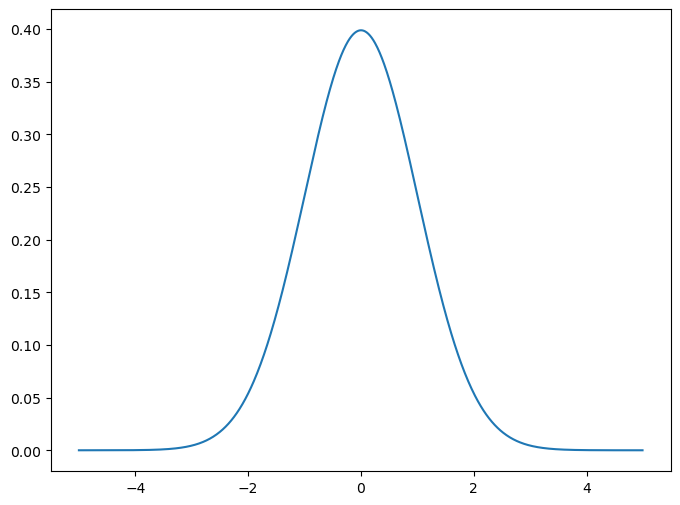

In [48]:
from scipy.stats import norm

x = np.arange(-5,5,0.01)
plt.plot(x, norm.pdf(x, 0, 1))

 
# To show the plot
plt.show()

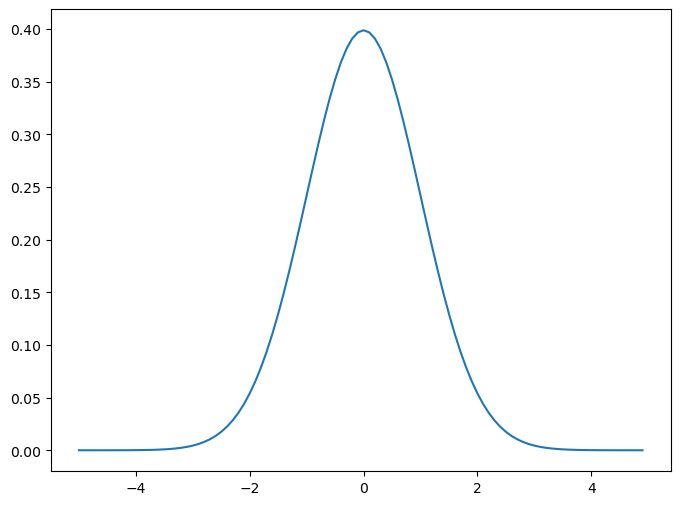

In [49]:
# A custom function to calculate probability distribution function 
def pdf(x,m,std):      
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - m)**2 / (2 * std**2)) 
    return y_out 

# To generate an array of x-values 
x = np.arange(-5, 5, 0.1) 

# To generate an array of 
# y-values using corresponding x-values 
y = pdf(x,0,1) 

# Plotting the bell-shaped curve 
plt.plot(x, y) 
plt.show()

As discussed above in Section B.2, this distribution is called a normal distribution. Think of the noise values
falling inside the bell-shaped curve, so that the shape of the distribution is essentialy the envelope of a histogram of the values.

The peak shows where most of the noise datapoints fall (the mean). Very few noise datapoints fall at
the tails.

As shown in Section B.2, an interesting feature of the normal distribution is that the total area under
the curve sums to 1, no matter what the standard deviation is.

In [50]:
from sympy import *

x = Symbol('x')
bell = 1/(sqrt(2 * np.pi) * exp( x**2 / 2))

area = round(integrate(bell,(x,-oo,oo) ))
area

1

We can change the mean and standard deviation parameters to see how this distribution behaves.

Here the SD is set to 0.5.

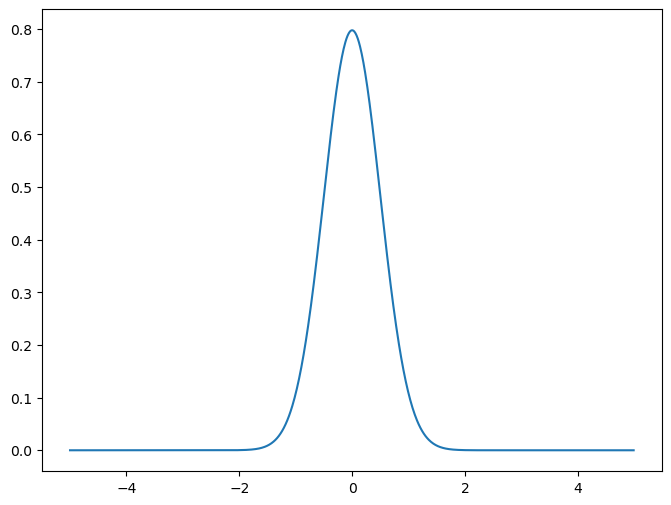

In [51]:
from scipy.stats import norm

x = np.arange(-5,5,0.01)
plt.plot(x, norm.pdf(x, 0, 0.5))

 
# To show the plot
plt.show()

Here the SD is set to 2.0.

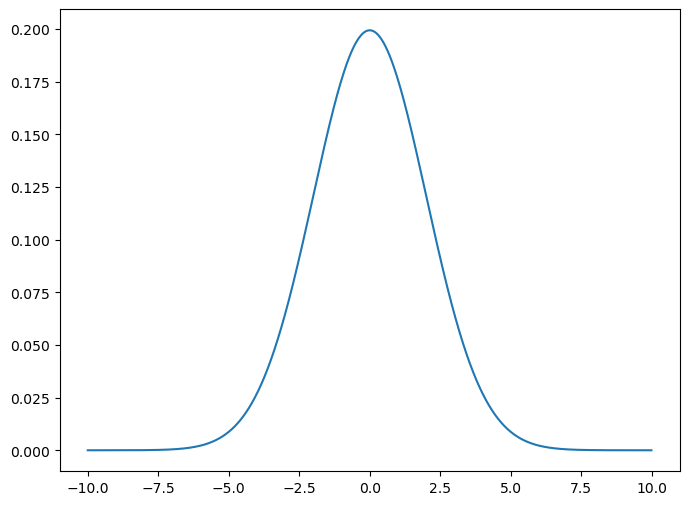

In [52]:
from scipy.stats import norm

x = np.arange(-10,10,0.01)
plt.plot(x, norm.pdf(x, 0, 2))

 
# To show the plot
plt.show()

Remember: the area under the idea curve is always 1.0.

Observations:
    
→ The plot of normal[x,mean,dev] crests when x = mean.

→ Smaller values of dev force a thinner, higher bell than do larger values of dev.

This is shown in the noise distribution plotted above. Plugging in a smaller standard deviation "dev" value compresses all
the datapoints into a narrow range. 

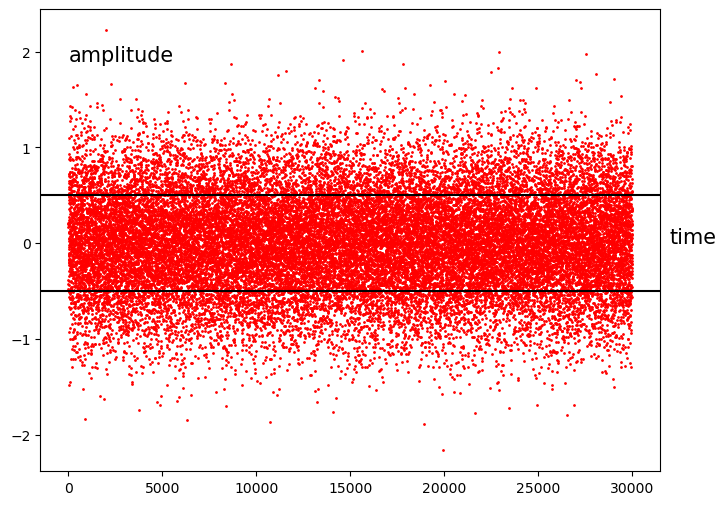

In [53]:
x = np.arange(0, 30000, 1)
noise = np.random.normal(0,0.5,30000)

plt.scatter(x, noise, c ="red", s=1)
plt.text(32000,0,'time', fontsize=15)
plt.text(0,1.9,'amplitude', fontsize=15)

plt.axhline(y=0.5, color='k')
plt.axhline(y=-0.5, color='k')
 
# To show the plot
plt.show()

Most of the values fall between +/- 0.5. In fact, because the standard deviation is 0.5, we know that 68.27% of the
values fall within the 1 standard deviation boundary (the distance from -0.5 to +0.5 is 1).

Plugging in a larger standard deviation value spreads the datapoints out across a larger range on the y axis.

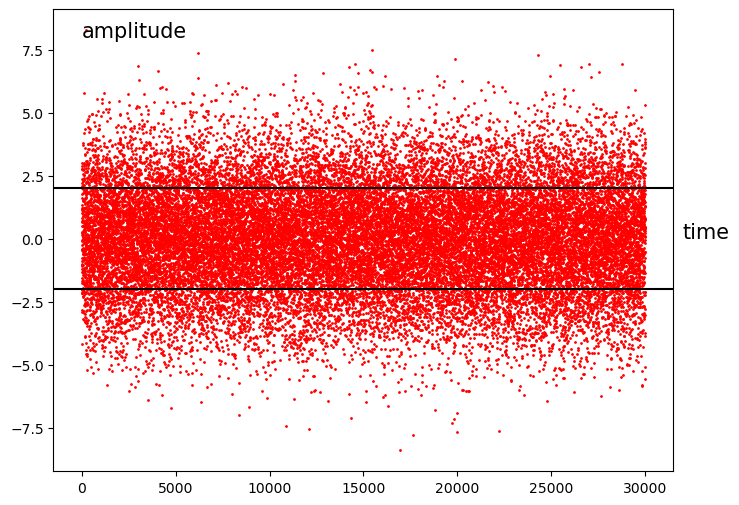

In [54]:
x = np.arange(0, 30000, 1)
noise = np.random.normal(0,2,30000)

plt.scatter(x, noise, c ="red", s=1)
plt.text(32000,0,'time', fontsize=15)
plt.text(0,8,'amplitude', fontsize=15)

plt.axhline(y=2, color='k')
plt.axhline(y=-2, color='k')
 
# To show the plot
plt.show()

Notice the change in the y axis.

Compare normal distribution curves with the different standard deviation terms. 

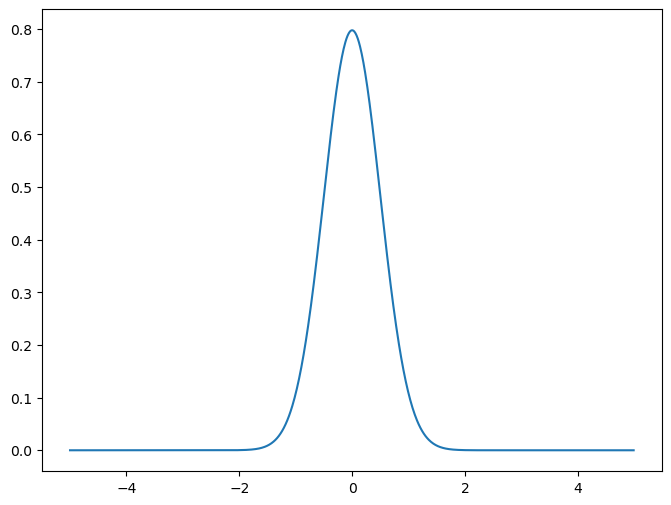

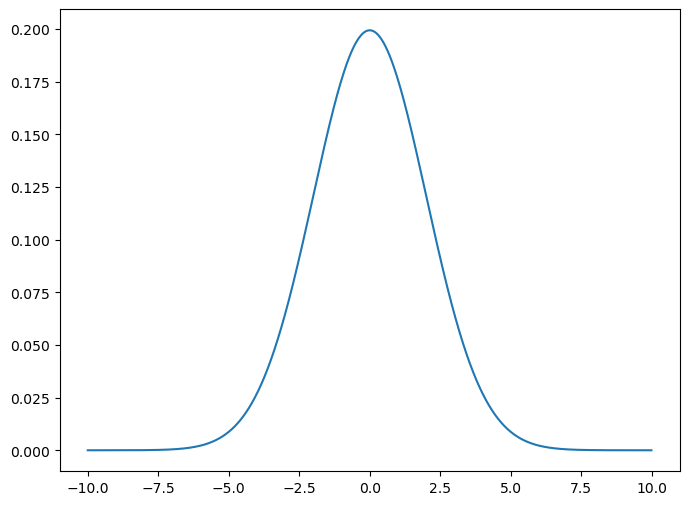

In [55]:
from scipy.stats import norm

x = np.arange(-5,5,0.01)
plt.plot(x, norm.pdf(x, 0, 0.5)) 
# To show the plot
plt.show()

x = np.arange(-10,10,0.01)
plt.plot(x, norm.pdf(x, 0, 2)) 
# To show the plot
plt.show()

When the standard deviation term is small (0.5), most of the values fall between +1.5/-1.5 (boundaries at
3 times the standard deviation).

When the standard deviation term is larger (2.0), the values are spread out over a larger range +6/-6
(boundaries at 3 times the standard deviation).

## <font color=red>DSP.04.B4)Spatial Patterns with Noise</font>

### <font color=red>DSP.04.B4.a) Spatial Patterns with Noise</font>

Let's switch from time to space. Create a spatial pattern.

In [ ]:
x = np.arange(0,1, 0.01)
y = np.arange(1, 0, -0.01)

X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 10 * X) 

plt.imshow(Z)
plt.show()

Now let's work in 2D. Here is a matrix of random numbers. The matrix of random numbers is the same size as the spatial
pattern above.

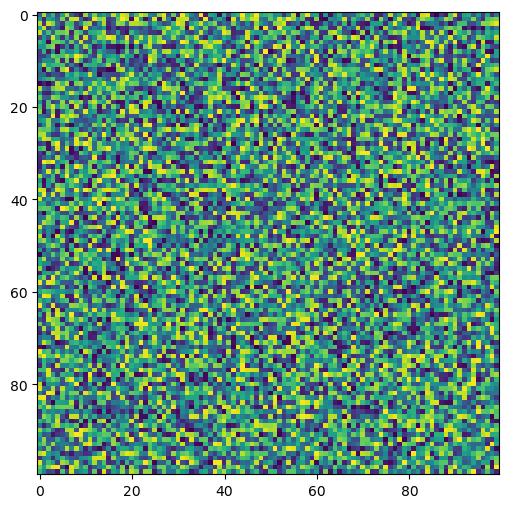

In [57]:
noise = np.random.random((len(x), len(x)))
plt.imshow(noise)
plt.show()

Add the original 1D sinusoidal spatial pattern to the noise.

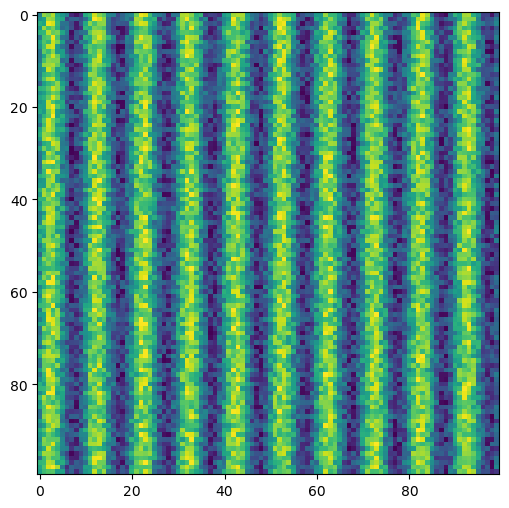

In [58]:
Z2 = Z + noise
plt.imshow(Z2)
plt.show()

Although you can see the sinusoidal original pattern, the image is distorted.
Can convolution be used to remove the noise?

Answer:
    
Kind of (how's that for an answer?).

Because the noise is random, it's not possible to remove activity at any specific frequency. (As we
learned in Lesson 2, random noise may contain equal activity at all frequencies. Random noise can also have an unequal distribution across frequencies - and still be random.)

Check it out. The code below selects a single row of the above spatial pattern and computes a
spectrum plot for activity in that column. (In these examples the frequency is the same across all
rows, so we just need to compute the spectrum for a single row.)

In [ ]:
row = Z2[0,:]
make_plot_freq_1(row,100)

# Adding text to the figure
plt.text(51,0,'Hz',fontsize=15)
plt.show()

A clear peak at 10 Hz, from the signal, but smaller amounts of activity are observed at other frequencies,
from the noise.

We can convolve using the 'moving average' kernel to create a filtered spatial pattern.

Create a 3 X 3 square matrix with constant values of the reciprocal of the size of the matrix.

In [ ]:
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]]) 

What activity will a kernel of size three remove? 100 datapoints were collected in each direction and
100/30 = 3.333 . Thus a kernel of size three should primarily remove 33 Hz activity and related frequencies.

Take another look.

In [ ]:
from scipy import signal
                  
Zfiltered = signal.convolve2d(Z2,kernel,boundary='symm', mode='same')
plt.imshow(Zfiltered)
plt.show()

The filtered image more closely approximates the original image, although significant distortion is still
present.

This is because the noise is not represented by a single frequency.

Change the size of the filter kernel to see if a better image can be obtained.

Try a smaller kernel. A kernel of size two will remove 50 Hz activity.

In [ ]:
from scipy import signal

kernel = np.array([[1/4, 1/4],
                   [1/4, 1/4]]) 

Zfiltered = signal.convolve2d(Z2,kernel,boundary='symm', mode='same')
plt.imshow(Zfiltered)
plt.show()

Try a larger kernel. Beware, though: this larger kernel may start to introduce 'blurring'.

In [ ]:
from scipy import signal

kernel = np.array([[1/16, 1/16, 1/16, 1/16],
                   [1/16, 1/16, 1/16, 1/16],
                   [1/16, 1/16, 1/16, 1/16],
                   [1/16, 1/16, 1/16, 1/16]])  

Zfiltered = signal.convolve2d(Z2,kernel,boundary='symm', mode='same')
plt.imshow(Zfiltered)
plt.show()

Yup. As the kernel size increases the image starts to 'blur'.

Because the spatial pattern contains activity at all frequencies (from the noise we included in it), the moving-average convolution technique
doesn't optimally remove the noise.

### <font color=red>DSP.04.B4.b) Averaging spatial data</font>

Create a spatial dataset with noise

In [ ]:
x = np.arange(0,1, 0.01)
y = np.arange(1, 0, -0.01)

X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 10 * X)

noise = np.random.random((len(x), len(x)))

Z2 = Z + noise
plt.imshow(Z2)
plt.show()

An averaging procedure can be used to remove random noise from a spatial dataset. In particular, as
long as the noise is random and the signal stable across instances of the dataset: by collecting and averaging more instances, the signal
will remain and noise will average out - because the noise is random.

The code below creates multiple 10 Hz spatial patterns with noise. For each 10 Hz sample, the 10 Hz
activity is constant, but the noise is random.

Obtain 5 averages.

In [ ]:
x = np.arange(0,1, 0.01)
y = np.arange(1,0,-0.01)

X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 10 * X)

noise_all = np.zeros((15, len(x), len(x))) #Set number of averages (5 or larger)
for n in range(4):
    noise_all[n,:] = np.random.random((len(x), len(x)))

noise = noise_all.mean(axis=0)

Z2 = Z + noise
plt.imshow(Z2)
plt.show()

Increase the '5' value to see how many samples need to be collected to remove most of the
noise.

Can you remove all the noise?